# Nipams Perform Experiments & Collect Results

In [1]:
# RUN_NAME = "all200_feb25_hb2"
RUN_NAME = "all200_dec13"
# DATA_NAME = "all200_feb25_hb2"
DATA_NAME = "all200_dec13"
# MAT_PATTERN = '(LV|res|rec|bre)\d+.mat'
MAT_PATTERN = r'\d+.mat'
LIMIT = 200
CONCAT_HEARTBEATS_NUM = 2
# CONCAT_HEARTBEATS_NUM = None
REPROCESS = False
FILE_PROCESSED = f'data/interim/{DATA_NAME}.pickle'
GBQ_RESULTS_TABLE = f'predictions.results_{RUN_NAME}'

# 0. Initialize

In [ ]:
#@title Connect to gDrive & Load Files
ENV_COLAB = 'google.colab' in str(get_ipython())
if ENV_COLAB:
    print('Running on CoLab')
    PROJECT_DRIVE_FOLDER= "/content/drive/MyDrive/NiPAMS/BP development/analysis/nipams-bp-py-main/" #@param {"type":"string"}
    ## Load this for local development version of library.. Loads from GoogleDrive (changes persist)
    from google.colab import drive, widgets, data_table; 
    drive.mount('/content/drive');
    %cd "$PROJECT_DRIVE_FOLDER"
  
    # !pip install -r requirements.txt
    !cat requirements.txt | xargs -n 1 pip install -1
    !pip install -q envyaml
    import os, sys; 
    from envyaml import EnvYAML; env = EnvYAML('env/default.yml'); 
    for k,v in env.export().items(): os.environ[k]=str(v)
    sys.path.append(os.path.abspath("./src"))

else:
    print('Not running on CoLab')
    %cd /app
!pwd

from importlib import reload;
from utils.constants import *

# 1. Load & Process Data

In [ ]:
from data import load_data; reload(load_data)
from data import preprocess;

if REPROCESS:
  _dfBp, _dfImu = load_data.load_dataframe_from_mat(folder='data/raw_mat/', pattern=MAT_PATTERN, limit_files=LIMIT)

  dfAll = preprocess.merge_imu_vcg_with_heartbeats(_dfBp, _dfImu)
  dfAll[IMU_DATA_COLS] = dfAll[IMU_DATA_COLS].astype(np.float32)
  dfAll[BP_COLS] = dfAll[BP_COLS].astype(np.float32)
  dfAll.to_pickle(path=FILE_PROCESSED)

In [ ]:
# dfBp, dfImu = load_data.load_dataframe_from_mat(folder='data/raw_mat/', pattern='LLV', limit_files=30)
dfAll = load_data.load_dataframe_from_pickle(path=FILE_PROCESSED)
dfImu = dfAll[INDICIES + INFO_COLS + IMU_COLS]
dfBp = dfAll[INDICIES + INFO_COLS + BP_COLS].drop_duplicates()

display('------ dfAll ------')
display("Unique Files : ", dfAll.file.nunique())
display(np.unique(dfAll.file))
display(dfAll)

'------ dfAll ------'

'Unique Files : '

199

array(['sub019_HLV1.mat', 'sub019_HLV2.mat', 'sub019_HLV3.mat',
       'sub019_LLV1.mat', 'sub019_LLV2.mat', 'sub019_LLV3.mat',
       'sub019_bre1.mat', 'sub019_rec1.mat', 'sub019_rec2.mat',
       'sub019_res1.mat', 'sub019_res2.mat', 'sub112_HLV1.mat',
       'sub112_HLV2.mat', 'sub112_HLV3.mat', 'sub112_LLV1.mat',
       'sub112_LLV2.mat', 'sub112_LLV3.mat', 'sub112_bre1.mat',
       'sub112_rec1.mat', 'sub112_rec2.mat', 'sub112_res1.mat',
       'sub112_res2.mat', 'sub115_HLV1.mat', 'sub115_HLV2.mat',
       'sub115_HLV3.mat', 'sub115_LLV1.mat', 'sub115_LLV2.mat',
       'sub115_LLV3.mat', 'sub115_bre1.mat', 'sub115_rec1.mat',
       'sub115_rec2.mat', 'sub115_res1.mat', 'sub115_res2.mat',
       'sub133_HLV1.mat', 'sub133_HLV2.mat', 'sub133_HLV3.mat',
       'sub133_LLV1.mat', 'sub133_LLV2.mat', 'sub133_LLV3.mat',
       'sub133_bre1.mat', 'sub133_rec1.mat', 'sub133_rec2.mat',
       'sub133_res1.mat', 'sub133_res2.mat', 'sub176_HLV1.mat',
       'sub176_HLV2.mat', 'sub176_HLV3.m

,file,ax,ay,az,gx,gy,gz,heartbeat,patient,test_type,test_num,tsCC,ts,pp,sbp,dbp
0,sub019_HLV1.mat,-1.089362,1.668758,-9.832985,1.037598,0.259399,0.053406,3.0,sub019,HLV,1,True,0 days 00:00:01.991000,62.045975,122.860863,60.814892
1,sub019_HLV1.mat,-1.012747,1.644816,-9.797072,1.289368,0.091553,-0.053406,3.0,sub019,HLV,1,True,0 days 00:00:01.996000,62.045975,122.860863,60.814892
2,sub019_HLV1.mat,-1.012747,1.632845,-9.829394,1.144409,0.480652,-0.221252,3.0,sub019,HLV,1,True,0 days 00:00:02.001000,62.045975,122.860863,60.814892
3,sub019_HLV1.mat,-1.023521,1.663970,-9.848548,1.296997,-0.476837,-0.026703,3.0,sub019,HLV,1,True,0 days 00:00:02.006000,62.045975,122.860863,60.814892
4,sub019_HLV1.mat,-1.039083,1.649605,-9.947906,1.518250,-0.831604,-0.411987,3.0,sub019,HLV,1,True,0 days 00:00:02.011000,62.045975,122.860863,60.814892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5109758,sub267_HLV2.mat,1.173159,1.845929,-9.873687,-0.007629,2.197266,0.091553,25.0,sub267,HLV,2,True,0 days 00:00:57.805000,64.464264,147.161850,82.697586
5109759,sub267_HLV2.mat,1.189918,1.874660,-9.897629,-0.526428,2.258301,0.106812,25.0,sub267,HLV,2,True,0 days 00:00:57.810000,64.464264,147.161850,82.697586
5109760,sub267_HLV2.mat,1.205480,1.856703,-9.850942,-0.488281,2.281189,0.007629,25.0,sub267,HLV,2,True,0 days 00:00:57.815000,64.464264,147.161850,82.697586
5109761,sub267_HLV2.mat,1.189918,1.860294,-9.842562,-0.503540,2.326965,0.198364,25.0,sub267,HLV,2,True,0 days 00:00:57.820000,64.464264,147.161850,82.697586


In [ ]:
def concat_heartbeats(dfImu, dfBp, num_heartbeats=1):
  dfImu_multihb = dfImu.copy()
  dfBp_multihb = dfBp.copy()
  dfImu_multihb['heartbeat'] = dfImu_multihb.heartbeat // num_heartbeats
  
  dfBp_multihb = dfBp_multihb.drop_duplicates()
  dfBp_multihb['heartbeat'] = dfBp_multihb.heartbeat // num_heartbeats
  dfBp_multihb = dfBp_multihb.drop_duplicates(subset=['file', 'heartbeat'], keep='last')

  return dfImu_multihb, dfBp_multihb

if (CONCAT_HEARTBEATS_NUM or 0) > 1:
  print(dfImu.shape, dfImu.heartbeat.mean(), dfBp.shape)
  dfImu_hb2, dfBp_hb2 = concat_heartbeats(dfImu, dfBp, CONCAT_HEARTBEATS_NUM)
  print(dfImu_hb2.shape, dfImu_hb2.heartbeat.mean(), dfBp_hb2.shape)
  dfImu, dfBp = dfImu_hb2, dfBp_hb2

(5109763, 12) 130.85872906434213 (30190, 8)
(5109763, 12) 65.17862139594341 (15280, 8)


In [ ]:
dfTmp = dfImu.merge(dfBp, on=['file','heartbeat'], how='left', suffixes=('','__tmp'))

import plotly.express as px
fig = px.line(
    dfTmp.head(10000).select_dtypes(include=np.number).sort_values('ts').drop('ts',axis=1),
    template = "plotly_white",
)
# fig.update_layout({
#   'plot_bgcolor': 'rgba(255, 255, 255, 1)',
#   'paper_bgcolor': 'rgba(255, 255, 255, 1)',
#   'paper_bgcolor': 'rgba(255, 255, 255, 1)',
# })
fig

Output hidden; open in https://colab.research.google.com to view.

# 2. Experiments

In [ ]:
import json
from models import experiments; reload(experiments)

<module 'models.experiments' from '/content/drive/.shortcut-targets-by-id/1MnayBGJfAervEVUyYNEibuPedW7NJuzm/NiPAMS/BP development/analysis/nipams-bp-py-main/src/models/experiments.py'>

In [ ]:
splits_random = experiments.split_by_random(dfBp=dfBp)
splits_group = experiments.split_by_group(dfBp=dfBp, **{**json.loads(experiments.DEFAULTS['split_by_group'])['kwargs'], 'split_kwargs':{'n_splits':3}})
splits_query = experiments.split_by_query(dfBp=dfBp, **json.loads(experiments.DEFAULTS['split_by_query'])['kwargs'])

In [ ]:
# # splitting_config = json.loads(experiments.DEFAULTS['split_by_random'])
# splitting_config = json.loads(experiments.DEFAULTS['split_by_group'])
# sampleRandTestInds = getattr(experiments, splitting_config['function'])(dfBp=dfBp, **splitting_config['kwargs'])

# sampleRandTestInds = [{
#     'train':x['train'].drop_duplicates(INDICIES),
#     'test':x['test'].drop_duplicates(INDICIES)
# } for x in sampleRandTestInds]
# # sampleRandTestInds[0]['train'].drop_duplicates(INDICIES)

# sampleExpDfs = experiments.get_experiment(sampleRandTestInds[0], dfImu, dfBp)

# 3. Modeling Pipelines (Baselines & Analytical)

In [ ]:

from models import baselines, feature_models; reload(feature_models)
import sklearn
from sklearn import pipeline, feature_selection, linear_model, ensemble
# from sklearn.pipeline import Pipeline

from models import baselines, feature_models; reload(feature_models)
from features import simple as features_simple, tsfel_vectorizer; reload(tsfel_vectorizer);


In [ ]:
#### Baselines
pipe_mean = pipeline.Pipeline([('transform', preprocess.TransformerTimeSeriesTo3D()),('baselines.DummyRegressor', baselines.DummyRegressor())])
pipe_random = pipeline.Pipeline([('transform', preprocess.TransformerTimeSeriesTo3D()),('baselines.RandomRegressor', baselines.RandomRegressor())])


In [ ]:
#### Simple Feature Methods
vectorizer_simple = preprocess.FunctionTransformer(partial(features_simple.vectorize_mean_std))
pipe_vect_simple_linear = pipeline.Pipeline([
    ('features_simple.vectorize_mean_std', vectorizer_simple),
    ('normalize_features',sklearn.preprocessing.StandardScaler()),
    ('model_Linear', sklearn.linear_model.LinearRegression())
])

pipe_vect_simple_rf = pipeline.Pipeline([
    ('features_simple.vectorize_mean_std', vectorizer_simple),
    ('model_RandomForest', sklearn.ensemble.RandomForestRegressor())
])


In [ ]:
# %%time
#### Advanced Feature Methods
# REPROCESS = True #@param{"type":"boolean"}
# FEATURE_DOMAINS = ['statistical']
FEATURE_DOMAINS = ['statistical','temporal','spectral']
FILE_FEATURES = f"data/vectors/{DATA_NAME}.feather"

if REPROCESS:
  dfVectors = tsfel_vectorizer.panelTSDataToVectors(dfImu, domains=FEATURE_DOMAINS, fs=1)
  dfVectors.astype(np.float32).reset_index().to_feather(path=FILE_FEATURES)

dfVects = pd.read_feather(FILE_FEATURES)

# dfVects = pd.concat([
#     pd.read_feather(f"data/vectors/dfImuVects-temporal-{PATTERN}.feather").set_index(INDICIES),
#     pd.read_feather(f"data/vectors/dfImuVects-statistical-{PATTERN}.feather").set_index(INDICIES)
# ], axis=1).reset_index()
dfVects.file = dfVects.reset_index().file.str.extract(pat='(sub[0-9]+_\w+.mat)$')
dfVects = dfVects.set_index(INDICIES)
tsVectorLookupTransform = sklearn.preprocessing.FunctionTransformer(tsfel_vectorizer.VectorLookup(dfVects))

pipe_vect_RF = pipeline.Pipeline([
    ('vectorize_lookup', tsVectorLookupTransform), 
    ('feat_select_simple', sklearn.feature_selection.VarianceThreshold()),
    ('feat_select_lin30', sklearn.feature_selection.SelectFromModel(sklearn.linear_model.LinearRegression(), max_features=30)),
    ('normalize_features',sklearn.preprocessing.StandardScaler()),
    # ('feat_select_mutualinfo50', sklearn.feature_selection.SelectKBest(sklearn.feature_selection.mutual_info_regression, k=50)),
    ('model_randomforest', sklearn.ensemble.RandomForestRegressor())
])
pipe_vect_GradBoost = pipeline.Pipeline([
    ('vectorize_lookup', tsVectorLookupTransform), 
    ('feat_select_simple', sklearn.feature_selection.VarianceThreshold()),
    ('feat_select_lin30', sklearn.feature_selection.SelectFromModel(sklearn.linear_model.LinearRegression(), max_features=30)),
    ('normalize_features',sklearn.preprocessing.StandardScaler()),
    ('model_gradientboost', sklearn.ensemble.GradientBoostingRegressor())
])

In [ ]:
tsExplodeTransformAxAz = preprocess.FunctionTransformer(partial(preprocess.explode_3d, data_cols=['ax', 'az']))
#### Analytical Approaches
from models import analytical_mvd; reload(analytical_mvd)

pipe_mvd = pipeline.Pipeline([('transform_3d_AxAz', tsExplodeTransformAxAz), ('model_analytical_calibrate', analytical_mvd.AnalyticalBPEstimator())])
pipe_mvd_fixed = pipeline.Pipeline([('transform_3d_AxAz', tsExplodeTransformAxAz), ('model_analytical_fixed', analytical_mvd.AnalyticalBPEstimatorFixed())])

In [ ]:

#### Deep Learning Approaches
# !pip install tsai
from models import nn_tsai; reload(nn_tsai)
model_tsai = nn_tsai.TSAI_InceptionTime(n_epoch=11)

tsExplodeTransform = preprocess.FunctionTransformer(partial(preprocess.explode_3d, data_cols=IMU_DATA_COLS))
tsReshape = preprocess.FunctionTransformer(lambda x : x.transpose(0,2,1))

pipe_TSAI = pipeline.Pipeline([('transform_3d', tsExplodeTransform),('transform_reshape', tsReshape), ('model_inceptiontime', model_tsai)])

# Run Experiments

## Individual Experiment

mean_absolute_error, r2_score :  6.351 -2.072
mean_absolute_error, r2_score :  5.403 -0.415
mean_absolute_error, r2_score :  5.496 -0.692
mean_absolute_error, r2_score :  6.129 -2.095
mean_absolute_error, r2_score :  9.908 -0.446
mean_absolute_error, r2_score :  10.448 -0.934
mean_absolute_error, r2_score :  10.1 -0.593
mean_absolute_error, r2_score :  9.302 -0.201
mean_absolute_error, r2_score :  9.376 -0.425
mean_absolute_error, r2_score :  9.279 -0.407
mean_absolute_error, r2_score :  9.055 -0.256
mean_absolute_error, r2_score :  9.182 -0.357


,file,heartbeat,patient,test_type,test_num,pp,sbp,dbp,fold_number,dbp_actuals,dbp_preds,sbp_actuals,sbp_preds,pp_actuals,pp_preds,experiment_id,pipeline
0,sub019_HLV1.mat,1.0,sub019,HLV,1,62.045975,122.860863,60.814892,3.0,60.814892,65.545591,122.860863,115.562974,62.045975,52.906574,tmp,"vectorize_lookup, feat_select_simple, feat_select_lin30, normalize_features, model_gradientboost"
1,sub019_HLV1.mat,2.0,sub019,HLV,1,60.555248,119.610153,59.054905,2.0,59.054905,65.24828,119.610153,119.711489,60.555248,51.505105,tmp,"vectorize_lookup, feat_select_simple, feat_select_lin30, normalize_features, model_gradientboost"
2,sub019_HLV1.mat,3.0,sub019,HLV,1,59.982533,117.207092,57.224560,3.0,57.22456,71.920583,117.207092,112.992958,59.982533,58.892855,tmp,"vectorize_lookup, feat_select_simple, feat_select_lin30, normalize_features, model_gradientboost"
3,sub019_HLV1.mat,4.0,sub019,HLV,1,61.335506,121.149841,59.814331,2.0,59.814331,67.291409,121.149841,116.847426,61.335506,50.925633,tmp,"vectorize_lookup, feat_select_simple, feat_select_lin30, normalize_features, model_gradientboost"
4,sub019_HLV1.mat,5.0,sub019,HLV,1,61.253841,123.968323,62.714481,2.0,62.714481,65.908972,123.968323,122.129572,61.253841,50.073862,tmp,"vectorize_lookup, feat_select_simple, feat_select_lin30, normalize_features, model_gradientboost"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15275,sub267_HLV2.mat,8.0,sub267,HLV,2,66.310738,150.227554,83.916817,3.0,83.916817,69.579843,150.227554,124.23532,66.310738,52.032031,tmp,"vectorize_lookup, feat_select_simple, feat_select_lin30, normalize_features, model_gradientboost"
15276,sub267_HLV2.mat,9.0,sub267,HLV,2,62.901997,147.496887,84.594894,2.0,84.594894,68.302153,147.496887,125.201284,62.901997,51.436875,tmp,"vectorize_lookup, feat_select_simple, feat_select_lin30, normalize_features, model_gradientboost"
15277,sub267_HLV2.mat,10.0,sub267,HLV,2,65.611107,148.986084,83.374969,3.0,83.374969,69.457933,148.986084,132.65416,65.611107,51.344353,tmp,"vectorize_lookup, feat_select_simple, feat_select_lin30, normalize_features, model_gradientboost"
15278,sub267_HLV2.mat,11.0,sub267,HLV,2,64.292938,144.730133,80.437187,0.0,80.437187,68.880195,144.730133,123.987934,64.292938,53.553123,tmp,"vectorize_lookup, feat_select_simple, feat_select_lin30, normalize_features, model_gradientboost"


<AxesSubplot:title={'center':'Random Forest Model'}, xlabel='sbp', ylabel='sbp_preds'>

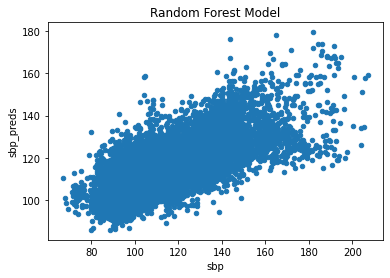

In [ ]:
# %%script false
# dfResults = experiments.run_experiment("tmp", dfImu, dfBp, pipe_mvd_fixed, splits_random[:1])
dfResults = experiments.run_experiment("tmp", dfImu, dfBp, pipe_vect_GradBoost, splits_random)
# dfResults = experiments.run_experiment("tmp", dfImu, dfBp, pipe_TSAI, splits_random[:1])

display(dfResults)
dfResults.plot.scatter('sbp','sbp_preds', title='Random Forest Model')

## Many Experiments

In [ ]:
# !pip install google-cloud-bigquery
# !pip install -U pandas-gbq
# !pip install pandas-gbq -U

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# arr_breath_types = [HLV,LLV,RES,BRE,REC,MIX]
# arr_data_size = [sm, md, lg, all]
arr_splits = {
  "splits_random": splits_random, 
  "splits_query": splits_query, 
  "splits_group": splits_group,
}
arr_pipelines = {
  # "mean" : pipe_mean,
  # "random" : pipe_random,
  # "analytical_fixed" : pipe_mvd_fixed,
  # "analytical" : pipe_mvd,
  # "vect_simple_linear" : pipe_vect_simple_linear,
  # "vect_simple_rf" : pipe_vect_simple_rf,
  # "vect_RF" : pipe_vect_RF,
  # "vect_GradBoost" : pipe_vect_GradBoost,
  "nn_tsai" : pipe_TSAI,
}

bigquery_schema = [
    {'name':'file', 'type' : 'STRING'},
    {'name':'heartbeat', 'type' : 'FLOAT'},
    {'name':'patient', 'type' : 'STRING'},
    {'name':'test_type', 'type' : 'STRING'},
    {'name':'test_num', 'type' : 'STRING'},
    {'name':'pp', 'type' : 'FLOAT'},
    {'name':'sbp', 'type' : 'FLOAT'},
    {'name':'dbp', 'type' : 'FLOAT'},
    {'name':'fold_number', 'type' : 'FLOAT'},
    {'name':'dbp_actuals', 'type' : 'FLOAT'},
    {'name':'dbp_preds', 'type' : 'FLOAT'},
    {'name':'sbp_actuals', 'type' : 'FLOAT'},
    {'name':'sbp_preds', 'type' : 'FLOAT'},
    {'name':'pp_actuals', 'type' : 'FLOAT'},
    {'name':'pp_preds', 'type' : 'FLOAT'},
    {'name':'experiment_id', 'type' : 'INTEGER'},
    {'name':'pipeline', 'type' : 'STRING'},
    {'name':'uploaded_time', 'type' : 'TIMESTAMP'},
]

import datetime
def run_and_save_experiment(id, dfImu, dfBp, pipe, split, dataset='predictions.results'):
  dfResults = experiments.run_experiment(id, dfImu, dfBp, pipe, split)
  dfResults = dfResults.assign(uploaded_time = datetime.datetime.now())
  dfResults = dfResults.fillna(value=np.NaN)

  dfResults.to_csv(f'data/predictions/{id} - date:{datetime.datetime.now()}.csv')
  dfResults.to_gbq(f'predictions.results_{PATTERN}','nipams',
                        if_exists='append', table_schema=None,
                        # if_exists='append', table_schema=bigquery_schema,
                  )


for split_name, split in arr_splits.items():
  for pipe_name, pipe in arr_pipelines.items():
    experiment_name = f'data:{DATA_NAME} - run:{RUN_NAME} - split:{split_name} - pipe:{pipe_name}'
    print("------------------", experiment_name, "------------------")
    print(f"Started : {datetime.datetime.now()}")
    
    dfResults = experiments.run_experiment(experiment_name, dfImu, dfBp, pipe, split)
    dfResults = dfResults.assign(uploaded_time = datetime.datetime.now())
    dfResults = dfResults.fillna(value=np.NaN)
    dfResults.to_csv(f'data/predictions/{experiment_name} - date:{datetime.datetime.now()}.csv')
    dfResults.to_gbq(GBQ_RESULTS_TABLE,'nipams',
                if_exists='append', table_schema=None,
                # if_exists='append', table_schema=bigquery_schema,
    )
    
    # try:
    # run_and_save_experiment(experiment_name, dfImu, dfBp, pipe, split)
    # except Exception as e:
    #   print("ERROR -", e)
    print(f"Ended : {datetime.datetime.now()}")

# experiments.run_and_save_experiment('split:first50%perfile - model:baseline.random', dfImu, dfBp, pipe_random, splits_random)
# experiments.run_and_save_experiment('split:first50%perfile - model:tree', dfImu, dfBp, pipeVectRF, splits_random)
# experiments.run_and_save_experiment('split:first50%perfile - model:tree.gradboost', dfImu, dfBp, pipeVectGradBoost, splits_random)
print(f"DONE! : {datetime.datetime.now()}")

------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_random - pipe:nn_tsai ------------------
Started : 2023-02-27 19:10:43.581609
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.656017,0.694178,0.609391,0.833174,00:17
1,0.595694,0.637735,0.598162,0.798583,00:10
2,0.501158,0.410547,0.475114,0.640739,00:11
3,0.467261,0.382026,0.463437,0.618083,00:11
4,0.376778,0.343481,0.431676,0.586073,00:11
5,0.360791,0.307750,0.411162,0.554752,00:10
6,0.303329,0.275027,0.383977,0.524430,00:10
7,0.241922,0.258899,0.371019,0.508821,00:11
8,0.252813,0.239357,0.355024,0.489241,00:11
9,0.197094,0.226244,0.340698,0.475651,00:11


mean_absolute_error, r2_score :  3.408 0.724
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.594825,0.543562,0.561195,0.737267,00:11
1,0.513863,0.581512,0.587983,0.762569,00:11
2,0.523071,0.423108,0.492085,0.650467,00:11
3,0.436177,0.381376,0.463030,0.617557,00:11
4,0.372470,0.342381,0.436436,0.585133,00:11
5,0.316775,0.324022,0.429255,0.569229,00:11
6,0.283514,0.307143,0.419059,0.554205,00:11
7,0.235879,0.236196,0.360877,0.486000,00:11
8,0.207923,0.229947,0.357451,0.479528,00:11
9,0.203610,0.216051,0.344721,0.464813,00:11


mean_absolute_error, r2_score :  3.356 0.759
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.690290,0.569979,0.581853,0.754969,00:11
1,0.597119,0.853225,0.733513,0.923702,00:10
2,0.504944,0.441249,0.508225,0.664266,00:10
3,0.421919,0.444793,0.509828,0.666928,00:11
4,0.382239,0.323452,0.423781,0.568728,00:11
5,0.313896,0.294441,0.411642,0.542624,00:11
6,0.270786,0.248347,0.372222,0.498344,00:11
7,0.242361,0.228532,0.356944,0.478050,00:11
8,0.200856,0.215534,0.343177,0.464257,00:11
9,0.182068,0.198201,0.327478,0.445197,00:11


mean_absolute_error, r2_score :  3.354 0.747
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.641358,0.685427,0.636465,0.827905,00:11
1,0.587329,0.623107,0.591712,0.789371,00:11
2,0.487680,0.402961,0.476734,0.634792,00:10
3,0.419931,0.380851,0.471826,0.617131,00:11
4,0.357354,0.320125,0.420018,0.565796,00:11
5,0.379045,0.311189,0.424252,0.557843,00:11
6,0.314139,0.308506,0.420853,0.555433,00:11
7,0.272389,0.240347,0.367458,0.490252,00:11
8,0.239757,0.209899,0.338617,0.458147,00:11
9,0.212516,0.207579,0.334159,0.455608,00:11


mean_absolute_error, r2_score :  3.395 0.75
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.591627,0.578701,0.557114,0.760724,00:10
1,0.569003,0.493434,0.521656,0.702448,00:10
2,0.417384,0.416918,0.468289,0.645692,00:11
3,0.431770,0.402307,0.464352,0.634277,00:11
4,0.339240,0.323886,0.410665,0.569109,00:11
5,0.315353,0.348577,0.430131,0.590404,00:11
6,0.267650,0.309040,0.413343,0.555914,00:11
7,0.255914,0.237715,0.354053,0.487561,00:11
8,0.213162,0.220942,0.341828,0.470045,00:11
9,0.186930,0.210608,0.330558,0.458920,00:11


mean_absolute_error, r2_score :  6.182 0.752
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.575842,0.621000,0.575847,0.788035,00:11
1,0.511590,0.729217,0.642915,0.853942,00:11
2,0.457484,0.854932,0.751171,0.924625,00:11
3,0.405701,0.416207,0.475567,0.645141,00:11
4,0.328444,0.310937,0.398692,0.557617,00:11
5,0.327817,0.332737,0.415554,0.576833,00:11
6,0.254154,0.297493,0.393806,0.545429,00:11
7,0.230404,0.239350,0.351150,0.489235,00:11
8,0.205409,0.227512,0.339922,0.476983,00:11
9,0.194146,0.221042,0.335959,0.470151,00:11


mean_absolute_error, r2_score :  6.38 0.702
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.616752,0.622626,0.568096,0.789066,00:10
1,0.520853,0.486250,0.530297,0.697316,00:10
2,0.500774,0.441983,0.497115,0.664818,00:11
3,0.388561,0.403905,0.480322,0.635535,00:11
4,0.340518,0.292425,0.405498,0.540763,00:11
5,0.357130,0.350000,0.443441,0.591608,00:11
6,0.281767,0.248360,0.367919,0.498357,00:11
7,0.255669,0.227842,0.353198,0.477328,00:10
8,0.216519,0.208844,0.335130,0.456994,00:11
9,0.188957,0.200787,0.328058,0.448093,00:12


mean_absolute_error, r2_score :  6.348 0.734
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.593721,0.579607,0.559463,0.761320,00:11
1,0.508293,0.560209,0.560742,0.748471,00:11
2,0.449503,0.416804,0.468906,0.645604,00:11
3,0.428112,0.405004,0.462101,0.636399,00:11
4,0.349893,0.406253,0.455518,0.637380,00:11
5,0.364901,0.316063,0.401408,0.562195,00:11
6,0.272324,0.320391,0.406976,0.566031,00:11
7,0.242195,0.277610,0.372729,0.526887,00:11
8,0.215304,0.260103,0.361804,0.510003,00:11
9,0.183783,0.236039,0.344047,0.485838,00:11


mean_absolute_error, r2_score :  6.009 0.778
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.646089,0.739158,0.625475,0.859743,00:11
1,0.554310,0.545067,0.544030,0.738286,00:11
2,0.488245,0.491637,0.499858,0.701168,00:11
3,0.405692,0.355921,0.440442,0.596591,00:11
4,0.389669,0.338581,0.411418,0.581877,00:11
5,0.361944,0.367076,0.442691,0.605868,00:11
6,0.324007,0.299135,0.388993,0.546933,00:11
7,0.258701,0.247106,0.357476,0.497098,00:11
8,0.218253,0.242254,0.348929,0.492193,00:11
9,0.181170,0.222287,0.334324,0.471473,00:11


mean_absolute_error, r2_score :  7.236 0.451
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.688257,0.636731,0.619498,0.797954,00:11
1,0.552289,0.543343,0.557261,0.737119,00:11
2,0.503016,0.530195,0.529650,0.728145,00:11
3,0.409801,0.378066,0.440582,0.614870,00:11
4,0.362473,0.348250,0.433926,0.590127,00:11
5,0.322532,0.305186,0.388652,0.552437,00:11
6,0.290548,0.274145,0.370622,0.523588,00:11
7,0.255440,0.265170,0.361938,0.514947,00:11
8,0.205461,0.242356,0.344696,0.492297,00:11
9,0.198977,0.234351,0.338487,0.484098,00:11


mean_absolute_error, r2_score :  7.418 0.463
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.577431,0.626845,0.580354,0.791735,00:11
1,0.544119,0.498992,0.504812,0.706393,00:11
2,0.459235,0.484425,0.486124,0.696007,00:11
3,0.420434,0.362893,0.432087,0.602406,00:11
4,0.403192,0.375589,0.445359,0.612853,00:11
5,0.332469,0.307391,0.400210,0.554429,00:11
6,0.290686,0.278581,0.371812,0.527808,00:11
7,0.263147,0.289901,0.392289,0.538424,00:11
8,0.219474,0.234592,0.348090,0.484347,00:11
9,0.186601,0.216136,0.328023,0.464904,00:11


mean_absolute_error, r2_score :  7.43 0.468
TSAI.fit X object (11460, 7, 190)
TSAI.fit y float32 (11460,)
TSAI.fit X float32 (11460, 6, 190)
TSAI.fit y float32 (11460,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.625671,0.589685,0.575872,0.767910,00:11
1,0.542729,0.474669,0.496916,0.688962,00:11
2,0.489835,0.452587,0.500560,0.672746,00:11
3,0.441580,0.399330,0.458773,0.631926,00:11
4,0.390471,0.364575,0.425658,0.603801,00:11
5,0.346835,0.317284,0.404667,0.563279,00:11
6,0.257004,0.278210,0.383617,0.527456,00:11
7,0.256280,0.244186,0.352114,0.494151,00:11
8,0.213025,0.219392,0.331307,0.468394,00:11
9,0.176197,0.217276,0.326708,0.466129,00:11


mean_absolute_error, r2_score :  7.011 0.502


100%|██████████| 1/1 [00:00<00:00, 10951.19it/s]


Ended : 2023-02-27 19:41:35.440975
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_query - pipe:nn_tsai ------------------
Started : 2023-02-27 19:41:35.441097
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.080675,0.966171,0.789787,0.982940,00:00
1,1.130315,2.191567,1.153284,1.480394,00:00
2,1.106147,2.183565,1.080994,1.477689,00:00
3,1.105596,1.302730,0.898070,1.141372,00:00
4,1.079584,0.944823,0.772452,0.972020,00:01
5,1.065074,0.970292,0.792078,0.985034,00:00
6,1.049460,0.945569,0.768498,0.972404,00:00
7,1.029961,0.925745,0.761502,0.962156,00:00
8,1.006863,0.922510,0.762277,0.960474,00:00
9,0.987470,0.947648,0.772153,0.973472,00:00


mean_absolute_error, r2_score :  8.323 -18.956
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.037687,1.189348,0.835204,1.090572,00:00
1,1.097848,1.217590,0.840352,1.103444,00:00
2,1.088416,1.718391,1.003247,1.310874,00:00
3,1.035551,1.182595,0.840948,1.087472,00:00
4,1.028701,1.114071,0.809556,1.055496,00:00
5,1.015996,1.114107,0.801856,1.055513,00:00
6,0.996976,1.172713,0.825558,1.082919,00:00
7,0.975920,1.101541,0.802166,1.049543,00:00
8,0.974522,1.098843,0.793290,1.048257,00:00
9,0.966847,1.085204,0.788264,1.041731,00:00


mean_absolute_error, r2_score :  8.138 -27.104
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.104728,1.032680,0.794425,1.016209,00:01
1,1.119996,1.456683,0.953446,1.206931,00:00
2,1.106741,1.221046,0.871464,1.105010,00:00
3,1.068363,0.991118,0.768230,0.995549,00:00
4,1.051176,1.096648,0.814528,1.047210,00:00
5,1.028960,1.042765,0.788356,1.021159,00:00
6,1.016374,1.032609,0.781695,1.016174,00:00
7,1.000016,1.034146,0.780692,1.016929,00:00
8,0.979052,1.043697,0.783939,1.021615,00:00
9,0.975922,1.039288,0.783528,1.019455,00:00


mean_absolute_error, r2_score :  8.115 -25.634
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.044787,1.236271,0.836116,1.111877,00:00
1,1.038721,1.567091,1.005088,1.251835,00:00
2,1.057288,1.436193,0.932550,1.198413,00:00
3,1.023780,1.298342,0.878574,1.139448,00:00
4,0.983295,1.210249,0.840266,1.100113,00:00
5,0.967030,1.190570,0.836281,1.091133,00:00
6,0.968526,1.244063,0.844795,1.115376,00:00
7,0.947538,1.240734,0.844228,1.113882,00:00
8,0.941241,1.226773,0.840289,1.107598,00:00
9,0.932683,1.241369,0.846900,1.114167,00:00


mean_absolute_error, r2_score :  8.096 -13.341
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.194913,1.149990,0.854935,1.072376,00:00
1,1.131543,1.530607,0.961282,1.237177,00:00
2,1.073553,1.476609,0.942889,1.215158,00:00
3,1.045468,1.170694,0.867573,1.081986,00:00
4,1.020812,1.172565,0.870529,1.082851,00:00
5,1.005634,1.180920,0.862470,1.086701,00:00
6,0.955668,1.134312,0.854417,1.065041,00:00
7,0.957214,1.186183,0.873630,1.089120,00:00
8,0.945098,1.181386,0.876678,1.086916,00:00
9,0.939616,1.179886,0.877028,1.086225,00:00


mean_absolute_error, r2_score :  15.47 -25.219
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.100399,1.011605,0.782670,1.005786,00:00
1,1.149416,1.126768,0.847533,1.061493,00:00
2,1.139214,1.096810,0.829412,1.047287,00:00
3,1.122299,0.999352,0.774284,0.999676,00:00
4,1.084089,0.953274,0.770261,0.976357,00:00
5,1.061653,0.960048,0.779434,0.979820,00:00
6,1.009935,0.923830,0.760635,0.961161,00:00
7,1.022281,0.914827,0.759484,0.956466,00:00
8,1.010311,0.931461,0.762824,0.965122,00:00
9,1.002457,0.922899,0.763932,0.960676,00:00


mean_absolute_error, r2_score :  15.15 -30.636
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.082969,1.107849,0.795659,1.052544,00:00
1,1.087673,3.718274,1.360942,1.928283,00:00
2,1.073454,1.327523,0.899216,1.152182,00:00
3,1.064776,1.398351,0.932891,1.182519,00:00
4,1.027826,1.071838,0.812266,1.035296,00:00
5,1.023666,1.081982,0.816089,1.040184,00:00
6,0.994590,1.081256,0.805839,1.039835,00:00
7,0.989976,1.101526,0.832180,1.049536,00:00
8,0.983027,1.044592,0.796216,1.022053,00:00
9,0.967126,1.047023,0.799770,1.023241,00:00


mean_absolute_error, r2_score :  15.547 -29.638
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.023207,1.276297,0.887102,1.129733,00:00
1,1.056674,4.961180,1.594083,2.227371,00:00
2,1.053084,1.367975,0.880892,1.169604,00:00
3,1.041273,1.143757,0.835796,1.069466,00:00
4,0.998522,1.120292,0.821425,1.058438,00:00
5,0.989969,1.108160,0.822002,1.052692,00:00
6,0.974788,1.139907,0.827763,1.067665,00:00
7,0.961876,1.097068,0.808712,1.047410,00:01
8,0.952970,1.096756,0.811973,1.047261,00:01
9,0.950201,1.101574,0.811331,1.049559,00:00


mean_absolute_error, r2_score :  15.19 -27.206
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.179222,1.385741,0.924463,1.177175,00:00
1,1.127993,2.885625,1.231642,1.698713,00:01
2,1.075606,1.277059,0.891343,1.130071,00:00
3,1.014649,1.185087,0.884351,1.088617,00:00
4,1.014344,1.193336,0.876978,1.092399,00:00
5,0.996061,1.271517,0.898774,1.127616,00:00
6,0.984305,1.186205,0.885396,1.089131,00:00
7,0.976338,1.217293,0.894850,1.103310,00:00
8,0.952813,1.221575,0.895644,1.105249,00:00
9,0.934093,1.220920,0.896627,1.104953,00:00


mean_absolute_error, r2_score :  14.447 -20.552
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.179557,1.006167,0.805759,1.003079,00:00
1,1.142661,1.506728,0.967145,1.227489,00:00
2,1.094572,1.258855,0.875196,1.121987,00:00
3,1.066804,1.021758,0.798401,1.010821,00:00
4,1.051538,1.002287,0.798451,1.001143,00:00
5,1.029139,1.033761,0.790782,1.016740,00:00
6,1.012488,0.940682,0.773348,0.969888,00:00
7,0.993134,0.948107,0.780065,0.973708,00:00
8,0.987622,0.956527,0.780452,0.978022,00:01
9,0.976474,0.952819,0.784385,0.976125,00:00


mean_absolute_error, r2_score :  14.287 -29.968
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.151879,0.982688,0.796115,0.991306,00:01
1,1.166544,1.873566,1.057142,1.368783,00:00
2,1.150954,1.266348,0.902195,1.125321,00:00
3,1.110193,0.989853,0.802136,0.994913,00:00
4,1.072560,0.989098,0.809847,0.994534,00:00
5,1.037074,1.035166,0.798347,1.017431,00:00
6,1.001956,0.970781,0.780996,0.985282,00:00
7,1.000395,0.987499,0.786383,0.993730,00:00
8,0.986875,0.996123,0.793398,0.998060,00:00
9,0.967669,0.978584,0.789166,0.989234,00:00


mean_absolute_error, r2_score :  14.524 -16.318
TSAI.fit X object (919, 7, 190)
TSAI.fit y float32 (919,)
TSAI.fit X float32 (919, 6, 190)
TSAI.fit y float32 (919,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,1.280062,0.941646,0.758775,0.970384,00:00
1,1.185050,1.856678,1.054965,1.362600,00:00
2,1.145707,1.203352,0.870490,1.096974,00:00
3,1.091483,1.053164,0.815858,1.026238,00:00
4,1.091856,0.908521,0.765283,0.953163,00:00
5,1.065899,0.916229,0.771522,0.957199,00:00
6,1.048841,0.979091,0.787311,0.989490,00:00
7,1.035172,0.916148,0.768787,0.957156,00:00
8,1.026430,0.935801,0.773059,0.967368,00:00
9,0.996308,0.925896,0.764836,0.962235,00:00


mean_absolute_error, r2_score :  14.106 -28.869


100%|██████████| 1/1 [00:00<00:00, 14926.35it/s]


Ended : 2023-02-27 19:45:38.104072
------------------ data:all200_feb25_hb2 - run:all200_feb25_hb2 - split:splits_group - pipe:nn_tsai ------------------
Started : 2023-02-27 19:45:38.104158
TSAI.fit X object (10243, 7, 190)
TSAI.fit y float32 (10243,)
TSAI.fit X float32 (10243, 6, 190)
TSAI.fit y float32 (10243,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.506358,0.556072,0.561135,0.745703,00:10
1,0.421347,0.371215,0.459117,0.609274,00:10
2,0.384708,0.354379,0.444889,0.595297,00:09
3,0.318066,0.285970,0.395932,0.534762,00:09
4,0.262274,0.314841,0.418650,0.561107,00:10
5,0.224724,0.222847,0.347757,0.472067,00:10
6,0.187978,0.193668,0.318525,0.440077,00:09
7,0.159588,0.182073,0.312021,0.426700,00:09
8,0.132617,0.162443,0.290798,0.403042,00:10
9,0.115625,0.156756,0.284525,0.395924,00:10


mean_absolute_error, r2_score :  9.091 -2.937
TSAI.fit X object (10045, 7, 190)
TSAI.fit y float32 (10045,)
TSAI.fit X float32 (10045, 6, 190)
TSAI.fit y float32 (10045,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.566404,0.518245,0.533276,0.719892,00:09
1,0.510685,0.434879,0.489673,0.659454,00:09
2,0.457866,0.432509,0.501430,0.657654,00:09
3,0.431367,0.376362,0.455695,0.613483,00:09
4,0.409194,0.339783,0.440791,0.582909,00:09
5,0.354796,0.340781,0.434366,0.583765,00:09
6,0.319524,0.283317,0.397423,0.532276,00:09
7,0.264869,0.243279,0.367386,0.493233,00:09
8,0.221278,0.226205,0.354004,0.475610,00:09
9,0.218500,0.210525,0.342558,0.458830,00:09


mean_absolute_error, r2_score :  10.545 -2.46
TSAI.fit X object (10272, 7, 190)
TSAI.fit y float32 (10272,)
TSAI.fit X float32 (10272, 6, 190)
TSAI.fit y float32 (10272,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.616621,0.731690,0.663829,0.855389,00:10
1,0.670272,0.712338,0.648943,0.844001,00:09
2,0.545901,0.510293,0.546974,0.714348,00:09
3,0.488898,0.433331,0.492008,0.658279,00:09
4,0.482293,0.495855,0.536286,0.704170,00:09
5,0.365640,0.421735,0.486801,0.649411,00:09
6,0.373814,0.323060,0.418804,0.568384,00:09
7,0.269491,0.293225,0.407234,0.541503,00:09
8,0.272263,0.259450,0.371349,0.509363,00:09
9,0.250671,0.242380,0.361568,0.492321,00:09


mean_absolute_error, r2_score :  10.201 -5.606
TSAI.fit X object (10243, 7, 190)
TSAI.fit y float32 (10243,)
TSAI.fit X float32 (10243, 6, 190)
TSAI.fit y float32 (10243,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.558584,0.492097,0.528130,0.701496,00:09
1,0.468401,0.568226,0.555187,0.753808,00:09
2,0.420787,0.405817,0.471363,0.637038,00:09
3,0.373124,0.362487,0.438339,0.602069,00:09
4,0.337630,0.292137,0.400677,0.540497,00:09
5,0.271768,0.277729,0.383486,0.527000,00:09
6,0.249512,0.283535,0.378667,0.532480,00:09
7,0.196682,0.218327,0.341424,0.467255,00:09
8,0.180994,0.192243,0.316497,0.438456,00:09
9,0.161383,0.186583,0.308468,0.431953,00:09


mean_absolute_error, r2_score :  18.514 -7.073
TSAI.fit X object (10045, 7, 190)
TSAI.fit y float32 (10045,)
TSAI.fit X float32 (10045, 6, 190)
TSAI.fit y float32 (10045,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.563948,0.662488,0.607319,0.813934,00:09
1,0.563133,0.522308,0.535359,0.722709,00:09
2,0.478681,0.412774,0.472834,0.642475,00:09
3,0.431017,0.423278,0.483725,0.650598,00:09
4,0.389492,0.374185,0.425117,0.611706,00:09
5,0.326405,0.353835,0.432231,0.594840,00:09
6,0.314071,0.290667,0.409402,0.539136,00:09
7,0.253280,0.241688,0.357576,0.491618,00:09
8,0.201440,0.220872,0.341725,0.469970,00:09
9,0.188171,0.210046,0.331531,0.458308,00:09


mean_absolute_error, r2_score :  16.863 -1.312
TSAI.fit X object (10272, 7, 190)
TSAI.fit y float32 (10272,)
TSAI.fit X float32 (10272, 6, 190)
TSAI.fit y float32 (10272,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.528745,0.461302,0.499098,0.679192,00:09
1,0.463596,0.535513,0.516857,0.731788,00:09
2,0.443476,0.429070,0.489579,0.655035,00:09
3,0.397787,0.333469,0.428364,0.577468,00:09
4,0.310454,0.293552,0.400447,0.541804,00:10
5,0.289824,0.271013,0.382955,0.520589,00:09
6,0.260318,0.243962,0.360284,0.493925,00:09
7,0.208511,0.234632,0.355034,0.484388,00:10
8,0.186992,0.212195,0.330759,0.460646,00:10
9,0.171780,0.196128,0.316087,0.442863,00:09


mean_absolute_error, r2_score :  14.883 -1.833
TSAI.fit X object (10243, 7, 190)
TSAI.fit y float32 (10243,)
TSAI.fit X float32 (10243, 6, 190)
TSAI.fit y float32 (10243,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.707242,0.650104,0.604946,0.806290,00:09
1,0.709543,0.634647,0.607206,0.796647,00:09
2,0.476707,0.455437,0.492660,0.674861,00:09
3,0.463577,0.345472,0.435185,0.587769,00:10
4,0.356916,0.299148,0.410143,0.546944,00:09
5,0.323214,0.254487,0.365854,0.504467,00:10
6,0.253825,0.237220,0.354711,0.487053,00:09
7,0.209727,0.202203,0.331027,0.449670,00:09
8,0.183626,0.192000,0.318684,0.438178,00:09
9,0.169279,0.186117,0.311709,0.431413,00:10


mean_absolute_error, r2_score :  17.423 -11.636
TSAI.fit X object (10045, 7, 190)
TSAI.fit y float32 (10045,)
TSAI.fit X float32 (10045, 6, 190)
TSAI.fit y float32 (10045,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.594154,0.653104,0.588507,0.808149,00:09
1,0.562943,0.468472,0.507454,0.684450,00:09
2,0.439199,0.424937,0.478187,0.651872,00:09
3,0.397501,0.360339,0.426564,0.600283,00:09
4,0.326722,0.343054,0.414033,0.585708,00:09
5,0.305938,0.304304,0.382620,0.551638,00:09
6,0.267529,0.305343,0.399770,0.552579,00:09
7,0.244726,0.257523,0.361317,0.507467,00:09
8,0.221813,0.223420,0.333272,0.472673,00:09
9,0.163708,0.211447,0.323657,0.459833,00:09


mean_absolute_error, r2_score :  15.054 -1.232
TSAI.fit X object (10272, 7, 190)
TSAI.fit y float32 (10272,)
TSAI.fit X float32 (10272, 6, 190)
TSAI.fit y float32 (10272,)


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.473031,0.423674,0.480252,0.650903,00:09
1,0.490477,0.385403,0.461895,0.620809,00:09
2,0.449276,0.422970,0.486638,0.650362,00:09
3,0.402703,0.409689,0.450492,0.640069,00:09
4,0.316822,0.288523,0.393815,0.537143,00:09
5,0.266485,0.302705,0.414254,0.550186,00:09
6,0.234985,0.275499,0.383276,0.524880,00:09
7,0.203546,0.212584,0.333010,0.461068,00:09
8,0.176628,0.189118,0.306127,0.434877,00:09
9,0.140808,0.178372,0.297705,0.422341,00:09


mean_absolute_error, r2_score :  14.262 -2.303


100%|██████████| 1/1 [00:00<00:00, 4588.95it/s]

Ended : 2023-02-27 20:06:16.888881
DONE! : 2023-02-27 20:06:16.889062


In [ ]:
#@title Test BigQuery Permissions etc
# %%script false
sql = """
    SELECT name
    FROM `bigquery-public-data.usa_names.usa_1910_current`
    WHERE state = 'TX'
    LIMIT 100
"""

# Run a Standard SQL query using the environment's default project
# df = pd.read_gbq(sql, dialect='standard')

project_id = 'nipams'
df = pd.read_gbq(sql, project_id=project_id, dialect='standard')
df

# ROUGH

In [ ]:
STOP_HERE

In [ ]:
GBQ_RESULTS_TABLE

In [ ]:
dfResults.to_gbq(GBQ_RESULTS_TABLE,'nipams',
    if_exists='append', table_schema=None,
    # if_exists='append', table_schema=bigquery_schema,
)

In [ ]:
pipe = pipe_vect_simple
splits = sampleRandTestInds

rfResults1 = experiments.testPipeline(dfImu, dfBp, pipe, splits, targetCol='dbp', verbose=True)
dfBpInd = dfBp.groupby(INDICIES).last()
dfResults1 = create_results_df('dbp', dfBpInd, splits, rfResults1)

rfResults2 = experiments.testPipeline(dfImu, dfBp, pipe, splits, targetCol='sbp', verbose=True)
dfResults2 = create_results_df('sbp', dfBpInd, splits, rfResults2)

dfResults1\
    .merge(dfResults2, left_index=True, right_index=True, suffixes=('','_drop1'))\

In [ ]:
dfResults1\
    .merge(dfResults2, left_index=True, right_index=True, suffixes=('','_drop1'))\

In [ ]:
## create_results_df
target = 'dbp'
results = rfResults1
i=0

col_actual = f'{target}_actuals'
col_pred = f'{target}_preds'
dfTestRes = dfBpInd.copy().assign(fold_number=None, **{col_actual:None, col_pred:None})

df_bp = dfBpInd.loc[splits[i]['test'].set_index(INDICIES).index].reset_index()
dfPreds = pd.DataFrame([results[i]['y_test'].values,results[i]['preds']], index=[col_actual,f'{target}_preds']).T
dfPreds[INDICIES] = splits[i]['test'].reset_index()[INDICIES]


dfRes = pd.merge(df_bp.set_index(INDICIES), dfPreds.set_index(INDICIES), left_index=True, right_index=True,)#.drop_duplicates(INDICIES).set_index(INDICIES)

dfRes = dfRes.assign(fold_number=i)

dfRes

dfTestRes.update(dfRes.drop(columns=BP_COLS))

In [ ]:
display(splits[0]['test'])
display(dfPreds)
display(df_bp)
display("-------------------")

display(splits[0]['test'].drop_duplicates(INDICIES))
display(dfPreds.drop_duplicates(INDICIES))
display(df_bp.drop_duplicates(INDICIES))

# dfTestRes.index.is_unique
# dfTestRes.index.is_unique
# dfRes.index.is_unique




In [ ]:
# dfBp.set_index(INDICIES).loc[sampleRandTestInds[0]['test'].index]
df_bp = dfBp.set_index(INDICIES).loc[sampleRandTestInds[0]['test'].set_index(INDICIES).index].reset_index()
df_bp.groupby(INDICIES).last()

In [ ]:
rfResults1[0]['y_test']

In [ ]:
dfResults1